# Lectura de datos y preprocesado

In [38]:
# imports
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# give each phase its name
phase_names = ['start', 'standup', 'walkingToStore', 'inEntrance', 'walkingToCorrectSection',
                'pickUpItem', 'walkingToCheckout', 'inTheCheckout', 'inItsTurn', 'goToTheExit',
                'inTheExit', 'comingBack', 'inTheStartPoint', 'end']

# read data
dataset_path = 'C:/Users/panos/Desktop/Proyecto Wearables/FrailtyStudy_Datasets/Cuestionarios y Wearables/Wearable Data/preprocesed/features_extracted/split_events/features_extracted_sr_0.04S_wz_0.5s.csv'
data = pandas.read_csv(dataset_path, sep=',')
print(f"Columns in the dataset are: {data.columns.values}")

# select valuable cols
cols_to_keep = ['Unnamed: 0', 'hr.mean', 'hr.sd', 'hr.min', 'hr.max', 'hr.range', 'hr.skew', 'hr.kurtosis']
data = data[cols_to_keep]

Columns in the dataset are: ['Unnamed: 0' 'gyr.x.mean' 'gyr.x.sd' 'gyr.x.min' 'gyr.x.max'
 'gyr.x.range' 'gyr.x.skew' 'gyr.x.kurtosis' 'gyr.y.mean' 'gyr.y.sd'
 'gyr.y.min' 'gyr.y.max' 'gyr.y.range' 'gyr.y.skew' 'gyr.y.kurtosis'
 'gyr.z.mean' 'gyr.z.sd' 'gyr.z.min' 'gyr.z.max' 'gyr.z.range'
 'gyr.z.skew' 'gyr.z.kurtosis' 'linacc.x.mean' 'linacc.x.sd'
 'linacc.x.min' 'linacc.x.max' 'linacc.x.range' 'linacc.x.skew'
 'linacc.x.kurtosis' 'linacc.y.mean' 'linacc.y.sd' 'linacc.y.min'
 'linacc.y.max' 'linacc.y.range' 'linacc.y.skew' 'linacc.y.kurtosis'
 'linacc.z.mean' 'linacc.z.sd' 'linacc.z.min' 'linacc.z.max'
 'linacc.z.range' 'linacc.z.skew' 'linacc.z.kurtosis' 'gra.x.mean'
 'gra.x.sd' 'gra.x.min' 'gra.x.max' 'gra.x.range' 'gra.x.skew'
 'gra.x.kurtosis' 'gra.y.mean' 'gra.y.sd' 'gra.y.min' 'gra.y.max'
 'gra.y.range' 'gra.y.skew' 'gra.y.kurtosis' 'gra.z.mean' 'gra.z.sd'
 'gra.z.min' 'gra.z.max' 'gra.z.range' 'gra.z.skew' 'gra.z.kurtosis'
 'pres.mean' 'pres.sd' 'pres.min' 'pres.max' 'pres.ran

In [40]:
# split id into id and phase
data[['patient_id', 'phase']] = data.iloc[:,0].str.split('_', expand=True)

# cast phase col to int
data['phase'] = data['phase'].astype(int)

# drop old id columns
data.drop(columns=['Unnamed: 0'], inplace=True)

In [41]:
data[['patient_id', 'phase']]

,patient_id,phase
0,CM1,1
1,CM1,2
2,CM1,3
3,CM1,4
4,CM1,5
...,...,...
1099,Z9,10
1100,Z9,11
1101,Z9,12
1102,Z9,13


In [28]:
data.iloc[np.where(data['patient_id'] == 'CM1')[0]]

,hr.mean,hr.sd,hr.min,hr.max,hr.range,hr.skew,hr.kurtosis,patient_id,phase
0,94.540896,0.003146,94.535733,94.545167,0.009433,-0.181433,-0.997340,CM1,1
1,94.538846,0.006101,94.528667,94.546667,0.018000,-0.367998,-1.205420,CM1,2
2,94.605767,0.007656,94.594049,94.617486,0.023437,-0.051348,-1.095035,CM1,3
3,94.528907,0.002644,94.524677,94.532692,0.008015,-0.131466,-1.065659,CM1,4
4,95.781196,0.015749,95.757005,95.805452,0.048447,-0.014994,-1.343989,CM1,5
5,94.531241,0.003077,94.526565,94.535871,0.009306,-0.076629,-0.931649,CM1,6
6,95.390567,0.014902,95.367730,95.413560,0.045830,-0.016036,-1.316047,CM1,7
7,96.650993,0.014642,96.628498,96.673539,0.045041,-0.012297,-1.373432,CM1,8
8,94.701491,0.008836,94.687913,94.715013,0.027100,-0.045272,-1.164953,CM1,9
9,94.528985,0.002455,94.525057,94.532500,0.007443,-0.122075,-0.989540,CM1,10


<BarContainer object of 14 artists>

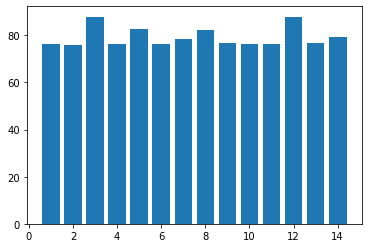

In [29]:
plt.bar(data['phase'].unique(), data.groupby('phase').mean(numeric_only = True)['hr.mean'])